# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [2]:
## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())
print('Total number of flights: ' + str(len(flight)))

   miles  passengers  delay inflight_meal inflight_entertainment   
0    792         172      0            No                    Yes  \
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price   
0           Yes      Sunday    Yes     Yes      338.820           1571.02  \
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
Total number of flights: 129780


In [3]:
print(flight.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB
None


44.415
593.635
376.58525308213905


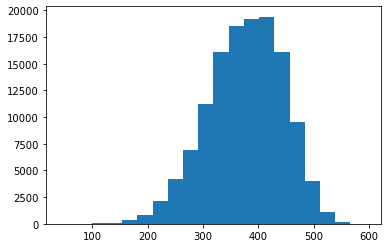

<Figure size 432x288 with 0 Axes>

In [4]:
## Task 1
print(flight.coach_price.min())
print(flight.coach_price.max())
print(flight.coach_price.mean())

plt.hist(flight.coach_price, bins=20)
plt.show()
plt.clf()

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

170.77
593.635
431.834377372817


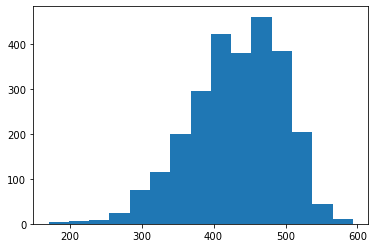

In [5]:
## Task 2
flight_8plus = flight[flight.hours == 8].coach_price
plt.hist(flight_8plus,bins=15)
print(flight_8plus.min())
print(flight_8plus.max())
print(flight_8plus.mean())


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

0
1560
13.162844814301126
9.0
10.0
13.0


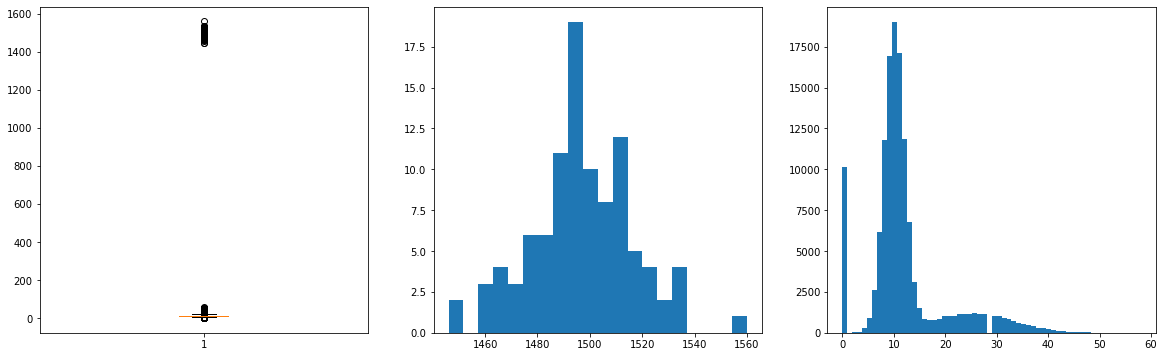

<Figure size 432x288 with 0 Axes>

In [7]:
## Task 3
print(flight.delay.min())
print(flight.delay.max())
print(flight.delay.mean())

# Allows to see the outliers
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.boxplot(flight.delay)

#There seems to be two groups, let us separate them
flight_long_delay = flight[flight.delay >= 1000].delay
flight_short_delay = flight[flight.delay < 1000].delay

print(flight_short_delay.quantile(.25))
print(flight_short_delay.quantile(.5))
print(flight_short_delay.quantile(.75))
plt.subplot(1,3,2)
plt.hist(flight_long_delay,bins=20)
plt.subplot(1,3,3)
plt.hist(flight_short_delay,bins=60)
plt.show()
plt.clf()


- Long delays seem to be normally distributed around 1500 min 
- Short delays (below 1000 min) are mostly of about 10 min with a long tail of up to 50.
- 75% of the short delay flight have delays below 13 minutes.


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

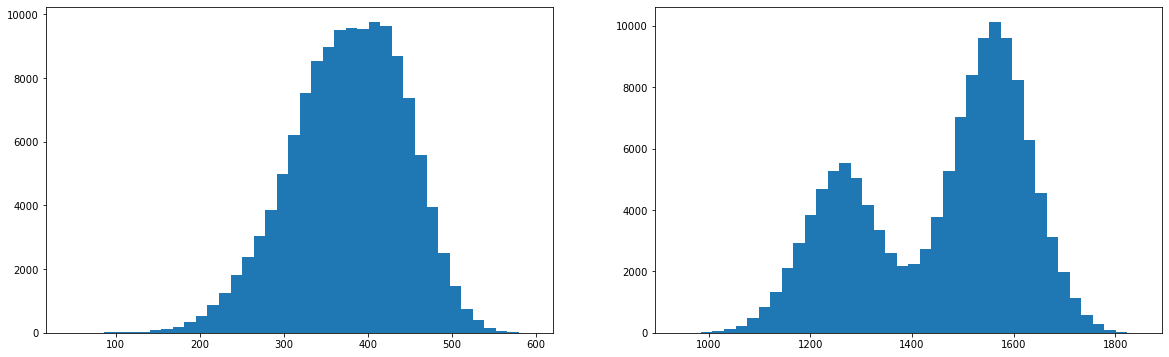

45091
89551


<Figure size 432x288 with 0 Axes>

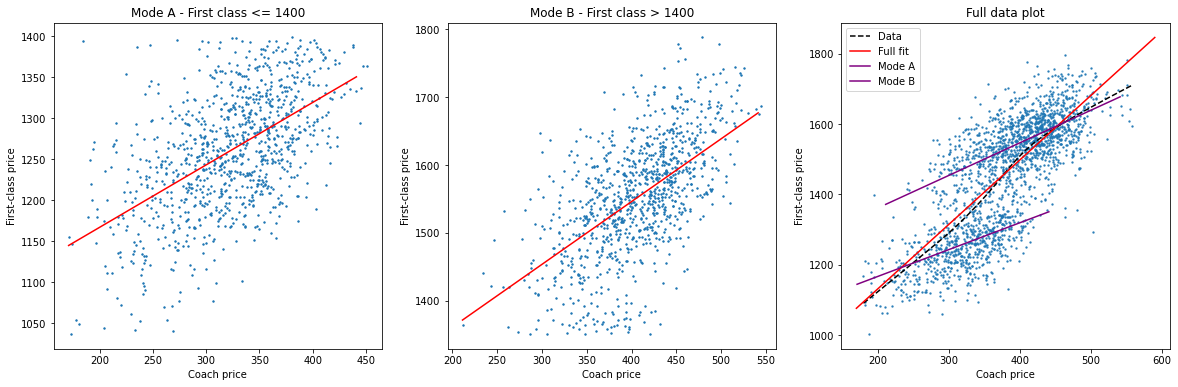


               firstclass_price I firstclass_price II firstclass_price III
--------------------------------------------------------------------------
Intercept      1014.3352          1176.0276           765.1344            
               (1.8092)           (1.7111)            (1.6856)            
coach_price    0.7624             0.9256              1.8312              
               (0.0056)           (0.0042)            (0.0044)            
R-squared      0.2930             0.3523              0.5722              
R-squared Adj. 0.2930             0.3523              0.5722              
Standard errors in parentheses.


<Figure size 432x288 with 0 Axes>

In [30]:
## Task 4
from statsmodels.iolib.summary2 import summary_col

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.hist(flight.coach_price,bins=40)
plt.subplot(1,2,2)
plt.hist(flight.firstclass_price,bins=40)
plt.show()
plt.clf()

# The firs class prices look bi-modal and can be studied separately to see if we find a stronger correlation as with the full data.
flights_A = flight[(flight.coach_price > 170) & (flight.firstclass_price <= 1400)]
flights_B = flight[(flight.coach_price > 170) & (flight.firstclass_price > 1350)]


print(len(flights_A))
print(len(flights_B))
sample_A = flights_A.sample(n=1000).reset_index()
coach_prices_A = sample_A["coach_price"]
first_class_prices_A = sample_A["firstclass_price"]
sample_B = flights_B.sample(n=1000).reset_index()
coach_prices_B = sample_B["coach_price"]
first_class_prices_B = sample_B["firstclass_price"]

model_full = sm.OLS.from_formula('firstclass_price ~ coach_price', data = flight[(flight.coach_price > 170)]) 
results_full = model_full.fit()

model_A = sm.OLS.from_formula('firstclass_price ~ coach_price', data = flights_A)
results_A = model_A.fit()

model_B = sm.OLS.from_formula('firstclass_price ~ coach_price', data = flights_B)
results_B = model_B.fit()

min_coach_full = flight[flight["coach_price"]>170].coach_price.min()
max_coach_full = flight[flight["coach_price"]>170].coach_price.max()
slope_full = results_full.params[1] 
interc_full = results_full.params[0]
x_values_full = np.arange(min_coach_full, max_coach_full,10)
y_values_full = x_values_full*slope_full + interc_full

min_coach_A = sample_A["coach_price"].min()
max_coach_A = sample_A["coach_price"].max()
slope_A = results_A.params[1] 
interc_A = results_A.params[0]
x_values_A = np.arange(min_coach_A, max_coach_A,10)
y_values_A = x_values_A*slope_A + interc_A

min_coach_B = sample_B["coach_price"].min()
max_coach_B = sample_B["coach_price"].max()
slope_B = results_B.params[1] 
interc_B = results_B.params[0]
x_values_B = np.arange(min_coach_B, max_coach_B,10)
y_values_B = x_values_B*slope_B + interc_B


fig, axes = plt.subplots(1,3,figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(coach_prices_A,first_class_prices_A, s=2)
plt.plot(x_values_A, y_values_A,color='red')
plt.title("Mode A - First class <= 1400")
plt.xlabel('Coach price')
plt.ylabel('First-class price')
plt.subplot(1,3,2)
plt.scatter(coach_prices_B,first_class_prices_B, s=2)
plt.plot(x_values_B, y_values_B,color='red')
plt.title("Mode B - First class > 1400")
plt.xlabel('Coach price')
plt.ylabel('First-class price')
plt.subplot(1,3,3)
sns.regplot(x='coach_price', y='firstclass_price', data = flight[flight["coach_price"]>170].sample(n=2000), line_kws={'color': 'black','linestyle':'--','linewidth':1.5}, scatter_kws={'s':2}, lowess=True)
plt.plot(x_values_full, y_values_full,color='red')
plt.plot(x_values_A, y_values_A,color='purple')
plt.plot(x_values_B, y_values_B,color='purple')
plt.title("Full data plot")
plt.xlabel('Coach price')
plt.ylabel('First-class price')
plt.legend(['Data','Full fit','Mode A','Mode B'])
plt.show()
plt.clf()

print(summary_col([results_A,results_B,results_full]))


- Generally we can say the higher the coach price, the higher the first class price, the relation seems to be relatively linear
- Fitting a line gives a pearson r of 0.57 which is almost 0.6 to the full data set
- Separating the apparent modes do not give a best linear fit and show a lower correlation. 

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

inflight_meal  inflight_entertainment  inflight_wifi
No             No                      No               252.172096
                                       Yes              321.979447
               Yes                     No               321.242905
                                       Yes              391.759040
Yes            No                      No               270.321501
                                       Yes              340.324662
               Yes                     No               340.067000
                                       Yes              411.075272
Name: coach_price, dtype: float64
inflight_meal  inflight_entertainment  inflight_wifi
No             No                      No               57.428672
                                       Yes              56.929559
               Yes                     No               57.186231
                                       Yes              57.378702
Yes            No                      No               57.1

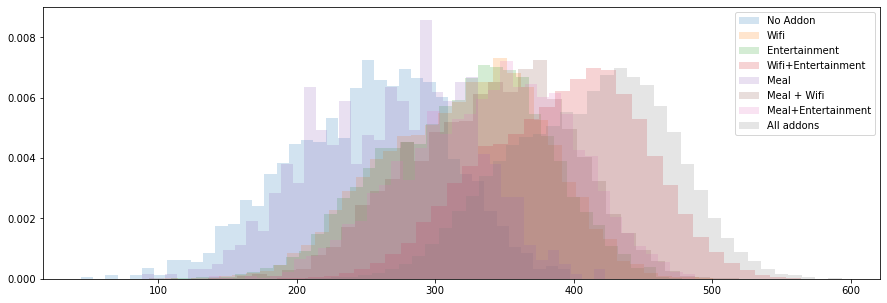

<Figure size 432x288 with 0 Axes>

In [94]:
## Task 5
print(flight.groupby(['inflight_meal','inflight_entertainment','inflight_wifi']).coach_price.mean())
print(flight.groupby(['inflight_meal','inflight_entertainment','inflight_wifi']).coach_price.std())

plt.figure(figsize=(15,5))
plt.hist(flight[(flight.inflight_meal == 'No') & (flight.inflight_entertainment == 'No') & (flight.inflight_wifi == 'No') ].coach_price, alpha=0.2, density=True,bins=40)
plt.hist(flight[(flight.inflight_meal == 'No') & (flight.inflight_entertainment == 'No') & (flight.inflight_wifi == 'Yes') ].coach_price, alpha=0.2, density=True,bins=40)
plt.hist(flight[(flight.inflight_meal == 'No') & (flight.inflight_entertainment == 'Yes') & (flight.inflight_wifi == 'No') ].coach_price, alpha=0.2, density=True,bins=40)
plt.hist(flight[(flight.inflight_meal == 'No') & (flight.inflight_entertainment == 'Yes') & (flight.inflight_wifi == 'Yes') ].coach_price, alpha=0.2, density=True,bins=40)
plt.hist(flight[(flight.inflight_meal == 'Yes') & (flight.inflight_entertainment == 'No') & (flight.inflight_wifi == 'No') ].coach_price, alpha=0.2, density=True,bins=40)
plt.hist(flight[(flight.inflight_meal == 'Yes') & (flight.inflight_entertainment == 'No') & (flight.inflight_wifi == 'Yes') ].coach_price, alpha=0.2, density=True,bins=40)
plt.hist(flight[(flight.inflight_meal == 'Yes') & (flight.inflight_entertainment == 'Yes') & (flight.inflight_wifi == 'No') ].coach_price, alpha=0.2, density=True,bins=40)
plt.hist(flight[(flight.inflight_meal == 'Yes') & (flight.inflight_entertainment == 'Yes') & (flight.inflight_wifi == 'Yes') ].coach_price, alpha=0.2, density=True,bins=40)

plt.legend(['No Addon','Wifi','Entertainment','Wifi+Entertainment','Meal','Meal + Wifi','Meal+Entertainment','All addons'])
plt.show()
plt.clf()


The differences among the means when varying 'Entertainment' or 'Wifi' is consistently around 70 dollars. (Seen by computing differences from the means in the table above)

Adding a meal however implies the smallest increase in price on average, the mean difference of corresponding options is around 20 dollars.

6. How does the number of passengers change in relation to the length of flights?

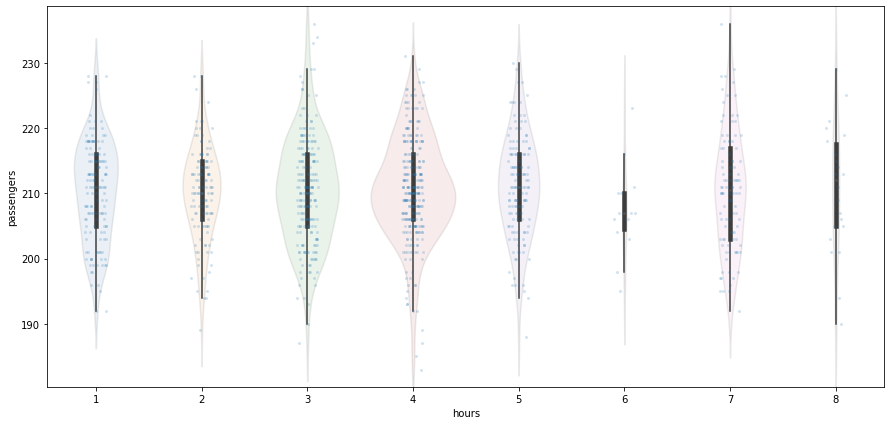

<Figure size 432x288 with 0 Axes>

In [146]:
## Task 6
flight_sample = flight[flight.passengers > 180].sample(n=1000)

plt.figure(figsize=(15,7))
ax = sns.violinplot(data=flight_sample, x='hours', y='passengers',showmeans = True, inner='box', scale='count' )
plt.setp(ax.collections, alpha=.1)
sns.stripplot(x='hours',y='passengers',data=flight_sample, s=3, alpha=0.2, jitter=.1)
plt.show()
plt.clf()


- We can see from the strip plot above combined with a violin plot that there are many more flights of around 3 to 4 hours compared to any other flight lenght.
- For flights of 5 hours or more, the number of flights decreases drastically
- The middle quartile (IQR) is accross the categories ranging from 205 to 215 passengers, except for flights of 6 hours where the statistics are bad and show a reduced range of 205 - 210 passengers.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

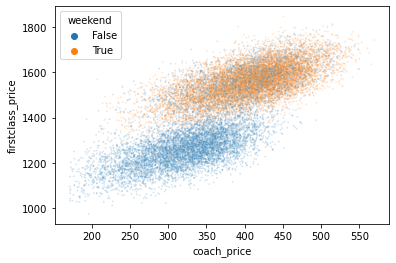

In [158]:
## Task 7
def is_weekend(day):
    if (day == "Saturday") or (day == "Sunday"):
        return True
    else:
        return False
flight['weekend'] = flight['day_of_week'].apply(lambda day: is_weekend(day)) 
flight_sample = flight[(flight.coach_price > 170) & (flight.coach_price < 570)].sample(n=20000)

sns.scatterplot(x='coach_price',y='firstclass_price',data=flight_sample, s=3,alpha=0.2, hue='weekend')


- The two modes found previously in Task 4 actually correspond to whether the flight took place on a week day or a weekend!

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

7


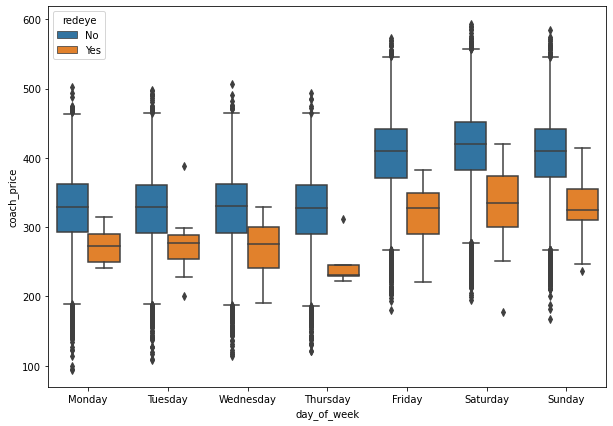

<Figure size 432x288 with 0 Axes>

In [338]:
## Task 8

flight_sample = flight[ (flight.passengers > 180) ].reset_index()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print(flight_sample.day_of_week.nunique())
# dfs = []
# for day in days:
#     dfs.append(flight_sample[flight.day_of_week == day])
    
plt.figure(figsize=(10,7))
sns.boxplot(data=flight_sample,x='day_of_week',y='coach_price',hue='redeye',order=days)
plt.show()
plt.clf()




- We can observe that redeye flights are overall cheaper than the non-redeye flights on any given day of the week.
- We also observe the prices of both types of flights tend to increase towards the end of the week and peak on Saturday. 
- We have also seen that the amount of redeye flights is considerably lower than the non-redeye version (see lengths of each series)